<a href="https://colab.research.google.com/github/hariomvyas/Stance-Detection/blob/main/TweetStanceDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal of the Model is to Determine the Stance of the tweet towards Amazon HQ2.
- Supportive
- Unsupportive
- Unrelated / Balanced

and Sentiment Analysis of it towards Amazon HQ2.
- Positive
- Negative
- Neutral



In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 28.7 MB/s eta 0:00:00


In [ ]:
!pip install odfpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 KB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160691 sha256=b3233d0d04208cb6cf82614b2c57bd06a59d48015505b21f9a76c4f630eef90a
  Stored in directory: /root/.cache/pip/wheels/20/ff/69/1b3f423ffe400b87afa368c70b43d2b5cd3bfb9ac8a613ba5b
Successfully built odfpy


In [101]:
# Importing required libraries

import pandas as pd
import numpy as np


### Data Preparation 

In [102]:
# DATASET_ENCODING = "ISO-8859-1"
brook_df = pd.read_excel("https://github.com/hariomvyas/Stance-Detection/blob/main/Data/Brooke_data.xlsx?raw=true", engine='openpyxl')
ian_df = pd.read_excel("https://github.com/hariomvyas/Stance-Detection/blob/main/Data/Ian_data.xlsx?raw=true", engine='openpyxl')
eric_df = pd.read_excel("https://github.com/hariomvyas/Stance-Detection/blob/main/Data/Eric_data.xlsx?raw=true", engine='openpyxl')

In [103]:
eric_df.columns

Index(['username', 'author_followers', 'author_tweets', 'author_description',
       'text', 'User type- Eric', 'Personal/Institutional-Eric', 'Topic-Eric',
       'Valence-Eric'],
      dtype='object')

In [104]:
ian_usertype_df = ian_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'User type-Ian']]
ian_perInsti_df = ian_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Personal/Institutional-Ian']]
ian_topic_df = ian_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Topic-Ian']]
ian_valence_df = ian_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Valence-Ian']]

brook_usertype_df = brook_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'User type-Brooke']]
brook_perInsti_df = brook_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Personal/Institutional-Brooke']]
brook_topic_df = brook_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Topic-Brooke']]
brook_valence_df = brook_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Valence-Brooke']]

eric_usertype_df = eric_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'User type- Eric']]
eric_perInsti_df = eric_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Personal/Institutional-Eric']]
eric_topic_df = eric_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Topic-Eric']]
eric_valence_df = eric_df[['username', 'author_followers', 'author_tweets', 'author_description', 'text', 'Valence-Eric']]

In [105]:
usertype_df = pd.concat([ian_usertype_df, brook_usertype_df, eric_usertype_df])
perInsti_df = pd.concat([ian_perInsti_df, brook_perInsti_df, eric_perInsti_df])
topic_df = pd.concat([ian_topic_df, brook_topic_df, eric_topic_df])
valence_df = pd.concat([ian_valence_df, brook_valence_df, eric_valence_df])

In [106]:
valence_df.head()

,username,author_followers,author_tweets,author_description,text,Valence-Ian,Valence-Brooke,Valence-Eric
0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Unsupportive,NaN,NaN
1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Supportive,NaN,NaN
2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Supportive,NaN,NaN
3,KathleenHenry10,317,1634,NaN,Listen to the experts ðŸ‘‡ðŸ‘‡ #TriangleDelive...,Supportive,NaN,NaN
4,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Unclear,NaN,NaN


In [107]:
## Creating a single UserType Column

usertype_df["User type-Ian"] = usertype_df["User type-Ian"].combine_first(usertype_df["User type-Brooke"])
usertype_df["User type-Ian"] = usertype_df["User type-Ian"].combine_first(usertype_df["User type- Eric"])
usertype_df = usertype_df.drop(["User type-Brooke", "User type- Eric"], axis=1)
usertype_df = usertype_df.drop_duplicates()
usertype_df = usertype_df.reset_index()

## Creating a single Personal / Institutional Column

perInsti_df["Personal/Institutional-Ian"] = perInsti_df["Personal/Institutional-Ian"].combine_first(perInsti_df["Personal/Institutional-Brooke"])
perInsti_df["Personal/Institutional-Ian"] = perInsti_df["Personal/Institutional-Ian"].combine_first(perInsti_df["Personal/Institutional-Eric"])
perInsti_df = perInsti_df.drop(["Personal/Institutional-Brooke", "Personal/Institutional-Eric"], axis=1)
perInsti_df = perInsti_df.drop_duplicates()
perInsti_df = perInsti_df.reset_index()

## Creating a single Topic Column

topic_df["Topic-Ian"] = topic_df["Topic-Ian"].combine_first(topic_df["Topic-Brooke"])
topic_df["Topic-Ian"] = topic_df["Topic-Ian"].combine_first(topic_df["Topic-Eric"])
topic_df = topic_df.drop(["Topic-Brooke", "Topic-Eric"], axis=1)
topic_df = topic_df.drop_duplicates()
topic_df = topic_df.reset_index()

## Creating a single Valence Column

valence_df["Valence-Ian"] = valence_df["Valence-Ian"].combine_first(valence_df["Valence-Brooke"])
valence_df["Valence-Ian"] = valence_df["Valence-Ian"].combine_first(valence_df["Valence-Eric"])
valence_df = valence_df.drop(["Valence-Brooke", "Valence-Eric"], axis=1)
valence_df = valence_df.drop_duplicates()
valence_df = valence_df.reset_index()


#### Our training data is ready. It contains 
- Username
- Author Followers
- Author Tweets
- Author Description
- Target Varibale: UserType, Personal / Institutional, Topic, Valence

In [113]:
DATASET_ENCODING = "ISO-8859-1"
full_data_df = pd.read_csv("https://raw.githubusercontent.com/hariomvyas/Stance-Detection/main/Data/Amazon12.csv", encoding=DATASET_ENCODING)
full_data_df

,Unnamed: 0,X,author_id,username,author_followers,author_tweets,author_description,author_location,text,created_at,...,RightCommentators,ResidentialRealtors,SiteSelectors,WatchDogGroups,Influencer,NewsM,Stakeholders,PoliticalGov,UserTypeListsAgg,Classified
0,1,1,15878040,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",michigan,- @Amazon #AmazonHQ2 narrowed its search for t...,2018-01-18 17:18:22+00:00,...,0,0,0,0,0,0,0,0,NaN,0
1,2,2,114782468,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",greatest city in the world,- @HPSInsight has an analysis of where #amazon...,2018-02-20 16:55:02+00:00,...,0,0,0,0,1,0,0,0,Influencer,0
2,3,3,60364834,detroitcp,2620,367177,breaking news and weather updates from detroit.,"detroit, mi",- Chad Livengood writes: On https://t.co/UKWMO...,2018-01-19 12:30:20+00:00,...,0,0,0,0,0,0,0,0,NaN,0
3,4,4,9273802,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,nyc,"- Since âpulling outâ Amazon has 1,577 new...",2019-12-07 17:57:52+00:00,...,0,0,0,0,0,0,0,0,NaN,1
4,5,5,853000000000000000,bezostown,546,8512,creator of bezostownbucks paper currency. this...,"seattle, wa",! Chicago âattempted to appeal personally to...,2018-11-15 18:08:35+00:00,...,0,0,0,0,1,0,0,0,Influencer,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39945,39946,39946,22962714,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates rents in Boston will rise $48...,2018-04-26 21:45:00+00:00,...,0,0,0,0,0,0,0,0,NaN,0
39946,39947,39947,22962714,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Denver will ris...,2018-04-26 23:05:00+00:00,...,0,0,0,0,0,0,0,0,NaN,0
39947,39948,39948,22962714,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Los Angeles wil...,2018-04-27 00:06:00+00:00,...,0,0,0,0,0,0,0,0,NaN,0
39948,39949,39949,14352556,seattletimes,692051,218463,"local news, sports, business, politics, entert...","seattle, wa","Zillow estimates that rents in Nashville, 1 of...",2018-04-26 00:32:22+00:00,...,0,0,0,0,0,0,0,0,NaN,1


In [114]:
full_data_df.columns

Index(['Unnamed: 0', 'X', 'author_id', 'username', 'author_followers',
       'author_tweets', 'author_description', 'author_location', 'text',
       'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'name',
       'profile_image_url', 'location.x', 'status_url', 'followers_count',
       'friends_count', 'Actor', 'BureaucraticOfficials', 'Celebrity', 'CEO',
       'Colleges', 'Colleges2', 'Commentator', 'CouncilManagerMayors',
       'Countries', 'Countries2', 'DemocratCongress', 'DemocratMayor',
       'EconDevAssociations', 'EconDevAssociations2', 'EDAssociation',
       'EDConsultants', 'EDConsultants2', 'Foreign', 'Foreign2', 'Foundation',
       'Government', 'GovernmentOfficials', 'LocalGovernmentOfficials',
       'MayorUS', 'MostFamousDemocrats', 'MostFamousRepublicans', 'News',
       'PoliticalOfficials', 'Pollsters', 'ProDevt', 'Professor',
       'RepublicanCongress', 'RepublicanMayors', 'Sports', 'StrongMayors',
       'ThinkTanks', 'ThinkTanks2', 'UniversityD

In [115]:
columns_to_drop = ['Unnamed: 0', 'X', 'author_id', 'created_at', 'retweets', 'replies', 'likes', 'quote_count', 'name',
       'profile_image_url', 'location.x', 'status_url', 'followers_count',
       'friends_count', 'Actor', 'BureaucraticOfficials', 'Celebrity', 'CEO',
       'Colleges', 'Colleges2', 'Commentator', 'CouncilManagerMayors',
       'Countries', 'Countries2', 'DemocratCongress', 'DemocratMayor',
       'EconDevAssociations', 'EconDevAssociations2', 'EDAssociation',
       'EDConsultants', 'EDConsultants2', 'Foreign', 'Foreign2', 'Foundation',
       'Government', 'GovernmentOfficials', 'LocalGovernmentOfficials',
       'MayorUS', 'MostFamousDemocrats', 'MostFamousRepublicans', 'News',
       'PoliticalOfficials', 'Pollsters', 'ProDevt', 'Professor',
       'RepublicanCongress', 'RepublicanMayors', 'Sports', 'StrongMayors',
       'ThinkTanks', 'ThinkTanks2', 'UniversityDomains', 'City', 'State',
       'MultiIncludesFullList', 'Multilocation', 'CategoryOfUser',
       'UserType.x', 'user_id', 'name.y', 'location.y', 'description', 'url',
       'UserType.y', 'Chamber', 'CommercialRealtors', 'CurrentCongress',
       'DemocratCongress2', 'Government2', 'Institutes', 'InterestActors',
       'Journalists', 'LeftCommentators', 'MayorUS2', 'MostFamousDemocrats2',
       'MostFamousRepublicans2', 'News2', 'Political', 'Pundits', 'Researcher',
       'RepublicansCongressHandles', 'RightCommentators',
       'ResidentialRealtors', 'SiteSelectors', 'WatchDogGroups', 'Influencer',
       'NewsM', 'Stakeholders', 'PoliticalGov', 'UserTypeListsAgg',
       'Classified']

In [116]:
# Remove column which are not required
full_data_df = full_data_df.drop(columns_to_drop, axis=1)

In [117]:
full_data_df

,username,author_followers,author_tweets,author_description,author_location,text
0,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",michigan,- @Amazon #AmazonHQ2 narrowed its search for t...
1,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",greatest city in the world,- @HPSInsight has an analysis of where #amazon...
2,detroitcp,2620,367177,breaking news and weather updates from detroit.,"detroit, mi",- Chad Livengood writes: On https://t.co/UKWMO...
3,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,nyc,"- Since âpulling outâ Amazon has 1,577 new..."
4,bezostown,546,8512,creator of bezostownbucks paper currency. this...,"seattle, wa",! Chicago âattempted to appeal personally to...
...,...,...,...,...,...,...
39945,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates rents in Boston will rise $48...
39946,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Denver will ris...
39947,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Los Angeles wil...
39948,seattletimes,692051,218463,"local news, sports, business, politics, entert...","seattle, wa","Zillow estimates that rents in Nashville, 1 of..."


In [118]:
# Full Data Preprocessing

full_data_df_new = full_data_df.convert_dtypes()
full_data_df_new = full_data_df_new.dropna()
full_data_df_new = full_data_df_new.reset_index()
full_data_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33325 entries, 0 to 33324
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               33325 non-null  int64 
 1   username            33325 non-null  string
 2   author_followers    33325 non-null  Int64 
 3   author_tweets       33325 non-null  Int64 
 4   author_description  33325 non-null  string
 5   author_location     33325 non-null  string
 6   text                33325 non-null  string
dtypes: Int64(2), int64(1), string(4)
memory usage: 1.8 MB


## Stance Detection

### UserType

In [145]:
## Data Preprocessing

usertype_df_new = usertype_df.convert_dtypes()
usertype_df_new = usertype_df_new.dropna()
usertype_df_new = usertype_df_new.reset_index()
usertype_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   level_0             134 non-null    int64 
 1   index               134 non-null    Int64 
 2   username            134 non-null    string
 3   author_followers    134 non-null    Int64 
 4   author_tweets       134 non-null    Int64 
 5   author_description  134 non-null    string
 6   text                134 non-null    string
 7   User type-Ian       134 non-null    string
dtypes: Int64(3), int64(1), string(4)
memory usage: 8.9 KB


In [148]:
usertype_df_new = usertype_df_new.drop(["level_0", "index"], axis=1)
usertype_df_new

,username,author_followers,author_tweets,author_description,text,User type-Ian
0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Other Relevant Actors
1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Media
2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Business Account
3,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",General Public
4,andrewmossca,341,1126,Champion of Human Potential â€¢ Guiding Ambiti...,@laurastevens Toronto #AmazonHQ2 #WeTheNorth,General Public
...,...,...,...,...,...,...
129,SuitesatMadison,201,417,Creating Community in #DowntownTampa . Shared ...,#AmazonHQ2 https://t.co/Rzde8WTSBa,Business Account
130,WCAX_Jack,1313,21530,"Sports Director for @WCAX, formerly WBOY. UVa ...","I love how there's 15 individual cities, two i...",General Public
131,DickYoungsGhost,2731,319553,The modern voice of one of the greatest sports...,@Pdzielinski @Peggynoonannyc @JimmyVanBramer J...,Media
132,rhayes1121,94,1356,Art V Propaganda - Life and times of ME ðŸ˜€ww...,Is starting a business in one of #Amazon 2d HQ...,Business Account


In [152]:
## Splitting data into training and testing

training_data = usertype_df_new[:100].reset_index()
training_data = training_data.drop(["index"], axis=1)
testing_data = usertype_df_new[100:].reset_index()
testing_data = testing_data.drop(["index"], axis=1)

In [154]:
testing_data

,username,author_followers,author_tweets,author_description,text,User type-Ian
0,FitzTrubey,3887,38469,I cover development for The Atlanta Journal-Co...,Massive downtown Atlanta project aimed at #Ama...,General Public
1,courtenaybird,7653,14962,"tech, marketing, books, dogs. From ATL to SF t...",Great debate last night on the lessons learned...,General Public
2,YIMBY_Princeton,4382,82999,Yes In My Backyard. Urbanism. Place. Transit. ...,Does anyone have any clue about when the #Amaz...,General Public
3,chipgoines,5047,192396,Turned out voters for @AyannaPressley's histor...,.@marty_walsh (@MartyForBoston) won't debate @...,Other Relevant Actors
4,FIBERTOWN,1914,18915,#Colocation #DataCenter #DisasterRecovery Camp...,"Approximately 25,000 jobs to be spread in at l...",Knowledge Workers
5,JulesAWarren,1530,17675,Deputy Director @RightOnCrime. Alum of USDOJ &...,Same. Look I donâ€™t know if Bezos is shady. W...,General Public
6,stratandbiz,147465,43499,Follow for the ideas that raise the game for d...,Olympic-bid style excitement surrounds the #Am...,Media
7,TRACEtexas,70,713,TRACE is a master-planned community in San Mar...,How San Marcos Would Benefit from an Austin Am...,Business Account
8,GHPartnership,21297,10497,Greater Houston Partnership's mission is to ma...,"Shortly after Hurricane Harvey, Amazon called....",Other Relevant Actors
9,IndyChamber,25855,17751,We empower business to ensure all have the opp...,The reason we are in top #amazonhq2 is because...,Other Relevant Actors


In [126]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [155]:
from os import path
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import pylab as py
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from tqdm import tqdm
from scipy import sparse
import csv, random, numpy, os, re, nltk, scipy, gensim
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from langdetect import detect
from sklearn.ensemble import RandomForestClassifier
from csv import DictReader
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier

In [156]:
data_df = pd.read_excel("/content/sentiment.xlsx", engine='openpyxl')
data_df.head()

,username,author_followers,author_tweets,author_description,author_location,text,sentiment,score
0,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",michigan,- @Amazon #AmazonHQ2 narrowed its search for t...,NEGATIVE,0.994882
1,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",greatest city in the world,- @HPSInsight has an analysis of where #amazon...,NEGATIVE,0.977926
2,detroitcp,2620,367177,breaking news and weather updates from detroit.,"detroit, mi",- Chad Livengood writes: On https://t.co/UKWMO...,NEGATIVE,0.995907
3,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,nyc,"- Since âpulling outâ Amazon has 1,577 new...",NEGATIVE,0.986987
4,bezostown,546,8512,creator of bezostownbucks paper currency. this...,"seattle, wa",! Chicago âattempted to appeal personally to...,POSITIVE,0.952286


In [157]:
def get_text(data):
  text = []
  for i in range(len(data["text"])):
    text.append(data["text"][i])
  return text

def get_description(data):
  description = []
  for i in range(len(data["author_description"])):
    description.append(data["author_description"][i])
  return description

In [158]:
from tables import description
# Extracting TFIDF Vectorizer for UserType
# https://www.kaggle.com/adamschroeder/countvectorizer-tfidfvectorizer-predict-comments

def extract_tfidf(training_text, training_description, test_text, test_description):

  ## Usertype Vectorization

  text_vectorizer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')
  text_tfidf = text_vectorizer.fit_transform(training_text)

  description_vectorizer = TfidfVectorizer(ngram_range=(1, 2), lowercase=True, stop_words='english')
  description_tfidf = description_vectorizer.fit_transform(training_description)

  text_tfidf_test = text_vectorizer.transform(test_text)
  description_tfidf_test = description_vectorizer.transform(test_description)

  feature_names = np.array(text_vectorizer.get_feature_names_out())
  sorted_by_idf = np.argsort(text_vectorizer.idf_) 
  print('Features with lowest and highest idf in the body vector:\n')
  # The token which appears maximum times but it is also in all documents, has its idf the lowest
  print("Features with lowest idf:\n{}".format(
  feature_names[sorted_by_idf[:10]]))
  # The tokens can have the most idf weight because they are the only tokens that appear in one document only
  print("\nFeatures with highest idf:\n{}".format(
  feature_names[sorted_by_idf[-10:]]))

  # Combine body_tfdif with headline_tfidf for every data point. 
  training_tfidf = scipy.sparse.hstack([text_tfidf, description_tfidf])
  test_tfidf = scipy.sparse.hstack([text_tfidf_test, description_tfidf_test])

  return training_tfidf, test_tfidf


In [159]:
lemmatizer = nltk.WordNetLemmatizer()

# Tokenisation, Normalisation, Capitalisation, Non-alphanumeric removal, Stemming-Lemmatization
def preprocess(string):
    # to lowercase, non-alphanumeric removal
    step1 = " ".join(re.findall(r'\w+', string, flags=re.UNICODE)).lower()
    step2 = [lemmatizer.lemmatize(t).lower() for t in nltk.word_tokenize(step1)]

    return step2

# Function for extracting word overlap
def extract_word_overlap(description, text):
    word_overlap = []
    for i, (description, text) in tqdm(enumerate(zip(description, text))):
        preprocess_description = preprocess(description)
        preprocess_text = preprocess(text)
        
        # Lenght of common words b/w text and description / Length of all the words of text & description
        features = len(set(preprocess_description).intersection(preprocess_text)) / float(len(set(preprocess_description).union(preprocess_text)))
        word_overlap.append(features)
        
        # Convert the list to a sparse matrix (in order to concatenate the cos sim with other features)
        word_overlap_sparse = scipy.sparse.coo_matrix(numpy.array(word_overlap)) 
    return word_overlap_sparse

In [160]:
# Function for extracting the cosine similarity between text and decription.
def extract_cosine_similarity(description, text):
    vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=True, stop_words='english')#, max_features=1024)
    
    cos_sim_features = []
    for i in range(0, len(text)):
        text_vs_description = []
        text_vs_description.append(text[i])
        text_vs_description.append(description[i])
        tfidf = vectorizer.fit_transform(text_vs_description)
        
        cosine_similarity = (tfidf * tfidf.T).A
        cos_sim_features.append(cosine_similarity[0][1])

    # Convert the list to a sparse matrix (in order to concatenate the cos sim with other features)
    cos_sim_array = scipy.sparse.coo_matrix(numpy.array(cos_sim_features)) 

    return cos_sim_array

In [161]:
# Function for combining features of various types (lists, coo_matrix, np.array etc.)
def combine_features(tfidf_vectors, cosine_similarity, word_overlap):
    combined_features =  sparse.bmat([[tfidf_vectors, word_overlap.T, cosine_similarity.T]])
    return combined_features

In [162]:
# Function for extracting features
# Feautres: 1) Word Overlap, 2) TF-IDF vectors, 3) Cosine similarity, 4) Word embeddings
def extract_features(train, test):
# Get bodies and headlines for dev and training data
    training_text = get_text(train)
    training_description = get_description(train)
    test_text = get_text(test)
    test_description = get_description(test)

    # Extract tfidf vectors
    print("\t-Extracting tfidf vectors..")
    training_tfidf, test_tfidf = extract_tfidf(training_text, training_description, test_text, test_description)
    print("\t-Tfidf vectors extracted..")

    # Extract word overlap 
    print("\t-Extracting word overlap..")
    training_overlap = extract_word_overlap(training_description, training_text)

    test_overlap = extract_word_overlap(test_description, test_text)
    print("\t-Word overlap extracted..")

#     # Extract cosine similarity between bodies and headlines. 
    print("\t-Extracting cosine similarity..")
    training_cos = extract_cosine_similarity(training_description, training_text)
    test_cos = extract_cosine_similarity(test_description, test_text)
    print("\t-Cosine similarity extracted..")

    # Combine the features
    training_features = combine_features(training_tfidf, training_cos, training_overlap)
    test_features = combine_features(test_tfidf, test_cos, test_overlap)
    print("\t-Combined features returned..")

    return training_features, test_features

In [163]:
# Feature extraction
print("[2] Extracting features.. ")
# extract_features(training_data, test_data)
training_features, test_features = extract_features(training_data, testing_data)

[2] Extracting features.. 
	-Extracting tfidf vectors..
Features with lowest and highest idf in the body vector:

Features with lowest idf:
['amazonhq2' 'https' 'amazon' 'amazonhq2 https' 'new' 'hq2' 'cities' 'amp'
 'amazon amazonhq2' 'need']

Features with highest idf:
['fulfillment' 'fucking unacceptable' 'fucking' 'fridaythoughts amazonhq2'
 'fridaythoughts' 'frenzied weeks' 'frenzied' 'free market' 'going buy'
 'œweâ going']
	-Tfidf vectors extracted..
	-Extracting word overlap..


100it [00:00, 830.03it/s]
34it [00:00, 874.03it/s]


	-Word overlap extracted..
	-Extracting cosine similarity..
	-Cosine similarity extracted..
	-Combined features returned..


In [164]:
classes = ['Bot', 'Business Account', 'General Public', 'Knowledge Workers', 'Media', 'Other Relevant Actors', 'Politicians/Government Accounts']

def report_score(test,pred,algo):
    #accuracy calculation
    accuracy = accuracy_score(test,pred)
    print('\n Accuracy_score for %s = %s \n'%(algo,accuracy))
    
    #confusion_matrix
    mat = confusion_matrix(test,pred)
    fig, ax = plt.subplots(figsize=(11,11))  
    ax.set_title("Confusion Matrix for %s" %algo)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,cmap="icefire",
                xticklabels=classes,yticklabels=classes,linewidths=.3, ax=ax)
    plt.xlabel('True label')
    plt.ylabel('Predicted label');

    #classification report
    cls = classification_report(test,pred, target_names=classes)
    print(cls)

In [168]:
# Creating targets

targets_tr = training_data['User type-Ian']
targets_test = testing_data['User type-Ian']

In [169]:
def change(f):
    if f == 'Other Relevant Actors':
        return 0
    elif f == 'Bot':
        return 1
    elif f == 'Business Account':
        return 2
    elif f == 'General Public':
        return 3
    elif f == 'Knowledge Workers':
        return 4
    elif f == 'Media':
        return 5
    elif f == 'Politicians/Government Accounts':
        return 6
    else:
        return 0

y = [change(x) for x in targets_tr]
y_test = [change(x) for x in targets_test]

In [170]:
def predict(self, text):
  predicted = self.logR_pipeline.predict([text])
  predicedProb = self.logR_pipeline.predict_proba([text])[:,1]
  return bool(predicted), float(predicedProb)

In [171]:
test_features

<34x4004 sparse matrix of type '<class 'numpy.float64'>'
	with 1814 stored elements in COOrdinate format>

[3] Fitting model..
	-Logistic Regression
[4] Evaluating model..

 Accuracy_score for Logistic Regression = 0.0 



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                            Bot       0.00      0.00      0.00       1.0
               Business Account       0.00      0.00      0.00       5.0
                 General Public       0.00      0.00      0.00      13.0
              Knowledge Workers       0.00      0.00      0.00       2.0
                          Media       0.00      0.00      0.00       2.0
          Other Relevant Actors       0.00      0.00      0.00       9.0
Politicians/Government Accounts       0.00      0.00      0.00       2.0

                       accuracy                           0.00      34.0
                      macro avg       0.00      0.00      0.00      34.0
                   weighted avg       0.00      0.00      0.00      34.0

	-Done with Logistic Regression


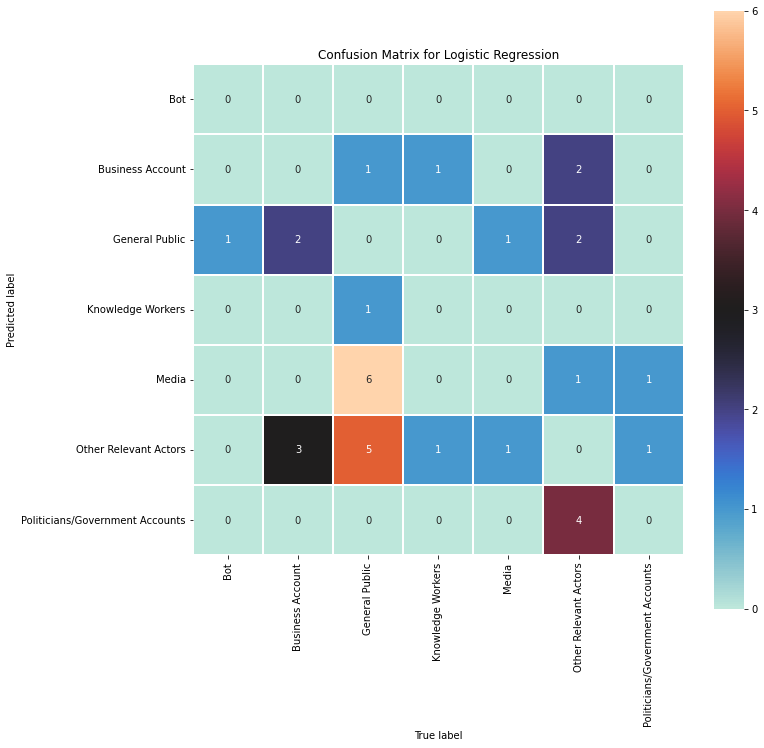

In [172]:
# Fitting model
print("[3] Fitting model..")
print("\t-Logistic Regression")
lr = LogisticRegression(C = 1.0, class_weight='balanced', solver="lbfgs", max_iter=150) 
y_pred_lr = lr.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_lr,'Logistic Regression')
print("\t-Done with Logistic Regression")

[3] Fitting model..
	-Random Forest Classifier
[4] Evaluating model..

 Accuracy_score for Random Forest Classifier = 0.029411764705882353 



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                            Bot       0.00      0.00      0.00         1
               Business Account       0.00      0.00      0.00         5
                 General Public       0.09      0.08      0.08        13
              Knowledge Workers       0.00      0.00      0.00         2
                          Media       0.00      0.00      0.00         2
          Other Relevant Actors       0.00      0.00      0.00         9
Politicians/Government Accounts       0.00      0.00      0.00         2

                       accuracy                           0.03        34
                      macro avg       0.01      0.01      0.01        34
                   weighted avg       0.03      0.03      0.03        34

	-Done with Random Forest Classifier


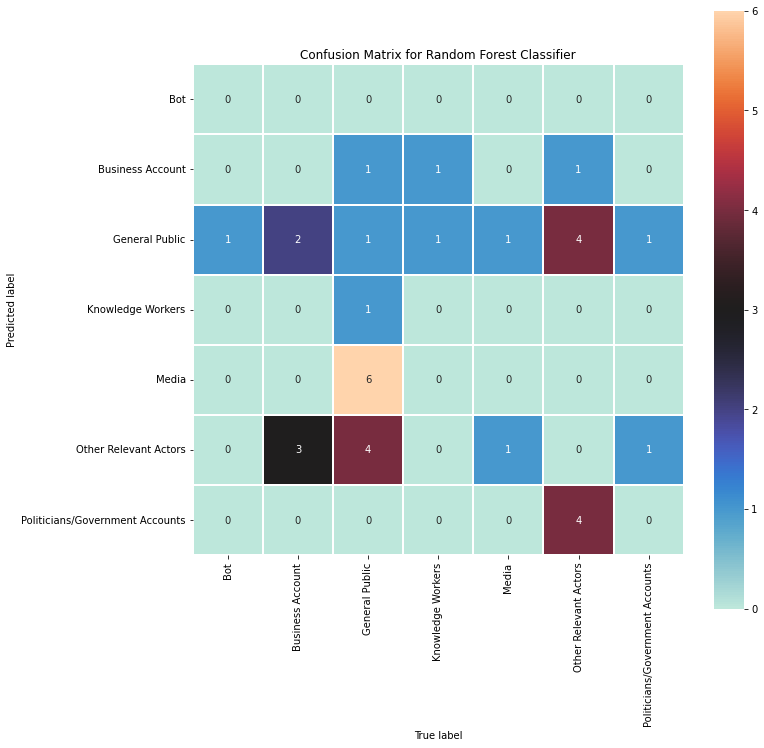

In [173]:
print("[3] Fitting model..")
print("\t-Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=10, random_state=12345)
y_pred_rf = rf.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_rf,'Random Forest Classifier')
print("\t-Done with Random Forest Classifier")

[3] Fitting model..
	-Multinomial Naive Bayes
[4] Evaluating model..

 Accuracy_score for Multinomial Naive Bayes = 0.0 



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                                 precision    recall  f1-score   support

                            Bot       0.00      0.00      0.00       1.0
               Business Account       0.00      0.00      0.00       5.0
                 General Public       0.00      0.00      0.00      13.0
              Knowledge Workers       0.00      0.00      0.00       2.0
                          Media       0.00      0.00      0.00       2.0
          Other Relevant Actors       0.00      0.00      0.00       9.0
Politicians/Government Accounts       0.00      0.00      0.00       2.0

                       accuracy                           0.00      34.0
                      macro avg       0.00      0.00      0.00      34.0
                   weighted avg       0.00      0.00      0.00      34.0

	-Done with Multinomial Naive Bayes


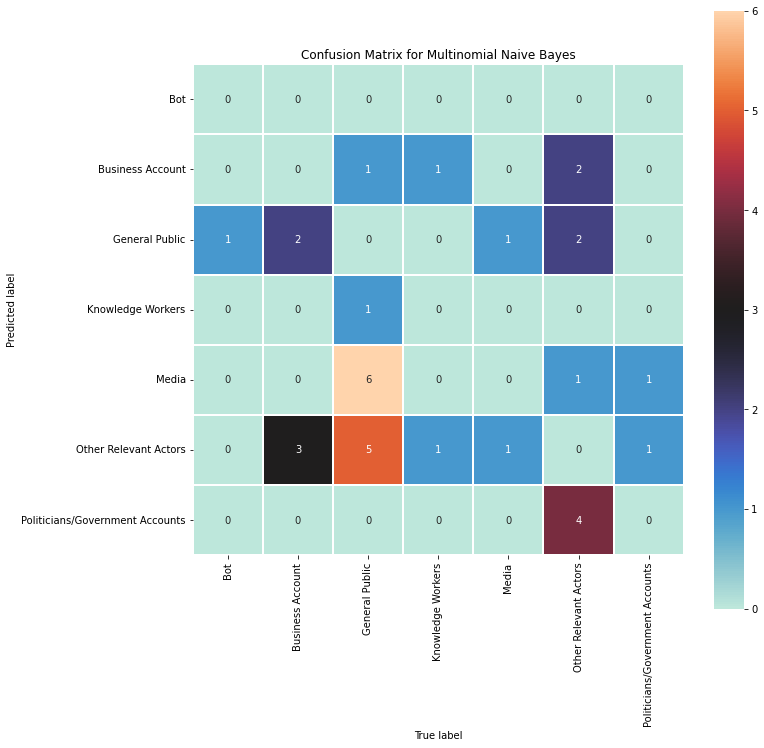

In [178]:
print("[3] Fitting model..")
print("\t-Multinomial Naive Bayes")
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
y_pred_nb = nb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'Multinomial Naive Bayes')
print("\t-Done with Multinomial Naive Bayes")

In [180]:
print("[3] Fitting model..")
print("\t-XGBoost Classifier")
xgb = XGBClassifier()
y_pred_xgb = xgb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'XGBoost')
print("\t-Done with XGBoost Classifier")

[3] Fitting model..
	-XGBoost Classifier


ValueError: ignored

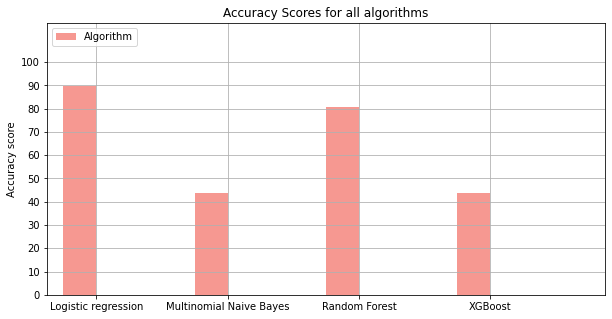

In [181]:
width = 0.25


# IMPROVED_SYSTEM: Logistic, MNV, RF
score = [89.88, 43.71, 80.54, 43.70]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

pos = list(range(len(score)))

plt.bar(pos, score, width, alpha=0.5, color='#EE3224', label='Development set')

# Set the y axis label
ax.set_ylabel('Accuracy score')

# Set the chart's title
ax.set_title('Accuracy Scores for all algorithms')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Logistic regression', 'Multinomial Naive Bayes', 'Random Forest', 'XGBoost'])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


plt.legend(['Algorithm'], loc='upper left')


plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(score)*1.3])

plt.grid()
plt.show()

In [182]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


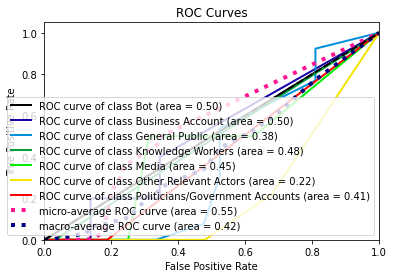

In [185]:
import scikitplot as skplt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# y_true = classes# ground truth labels
y_probas = rf.predict_proba(test_features)# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(targets_test, y_probas)
plt.show()

### Personal / Institutional

In [110]:
perInsti_df

,index,username,author_followers,author_tweets,author_description,text,Personal/Institutional-Ian
0,0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Institutional
1,1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Institutional
2,2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Personal
3,3,KathleenHenry10,317,1634,NaN,Listen to the experts ðŸ‘‡ðŸ‘‡ #TriangleDelive...,Personal
4,4,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Personal
...,...,...,...,...,...,...,...
107,82,DickYoungsGhost,2731,319553,The modern voice of one of the greatest sports...,@Pdzielinski @Peggynoonannyc @JimmyVanBramer J...,Institutional
108,88,rhayes1121,94,1356,Art V Propaganda - Life and times of ME\nðŸ˜€w...,Is starting a business in one of #Amazon 2d HQ...,Institutional
109,92,bezostown,546,8512,Creator of Bezostownbucks paper currency. This...,Weâ€™ve got Trumpâ€™s pee tape ... Amazon work...,Bot
110,94,lash_veira,1,404,NaN,#AmazonHQ2\n#Entrepreneur #expert #idea What I...,Bot


In [186]:
## Data Preprocessing

perInsti_df_new = perInsti_df.convert_dtypes()
perInsti_df_new = perInsti_df_new.dropna()
perInsti_df_new = perInsti_df_new.reset_index()
perInsti_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   level_0                     102 non-null    int64 
 1   index                       102 non-null    Int64 
 2   username                    102 non-null    string
 3   author_followers            102 non-null    Int64 
 4   author_tweets               102 non-null    Int64 
 5   author_description          102 non-null    string
 6   text                        102 non-null    string
 7   Personal/Institutional-Ian  102 non-null    string
dtypes: Int64(3), int64(1), string(4)
memory usage: 6.8 KB


In [187]:
perInsti_df_new = perInsti_df_new.drop(["level_0", "index"], axis=1)
perInsti_df_new

,username,author_followers,author_tweets,author_description,text,Personal/Institutional-Ian
0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Institutional
1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Institutional
2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Personal
3,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Personal
4,andrewmossca,341,1126,Champion of Human Potential â€¢ Guiding Ambiti...,@laurastevens Toronto #AmazonHQ2 #WeTheNorth,Personal
...,...,...,...,...,...,...
97,techjunkiejh,28555,403533,"https://t.co/mVXNWwBD1G , promoter of coding. ...",These U.S. cities have the best chance of bein...,Institutional
98,coolhand_luke88,911,25686,NYS Politics Digital News Producer for Spectru...,"Amazon Should Consider New York for HQ2, but P...",Institutional
99,DickYoungsGhost,2731,319553,The modern voice of one of the greatest sports...,@Pdzielinski @Peggynoonannyc @JimmyVanBramer J...,Institutional
100,rhayes1121,94,1356,Art V Propaganda - Life and times of ME ðŸ˜€ww...,Is starting a business in one of #Amazon 2d HQ...,Institutional


In [209]:
## Splitting data into training and testing

training_data = perInsti_df_new[:80].reset_index()
training_data = training_data.drop(["index"], axis=1)
testing_data = perInsti_df_new[80:].reset_index()
testing_data = testing_data.drop(["index"], axis=1)

In [210]:
# Feature extraction
print("[2] Extracting features.. ")
# extract_features(training_data, test_data)
training_features, test_features = extract_features(training_data, testing_data)

[2] Extracting features.. 
	-Extracting tfidf vectors..
Features with lowest and highest idf in the body vector:

Features with lowest idf:
['amazonhq2' 'https' 'amazon' 'amazonhq2 https' 'new' 'hq2' 'cities'
 'amazon amazonhq2' 'headquarters' 'bid']

Features with highest idf:
['fitness' 'financial life' 'financial' 'finalists dc'
 'finalists considered' 'finalists 238' 'final cities' 'final' 'follow'
 'œweâ going']
	-Tfidf vectors extracted..
	-Extracting word overlap..


80it [00:00, 1071.83it/s]
22it [00:00, 1107.33it/s]

	-Word overlap extracted..
	-Extracting cosine similarity..


	-Cosine similarity extracted..
	-Combined features returned..


In [211]:
classes = ['Bot', 'Personal', 'Institutional']

In [212]:
# Creating targets

targets_tr = training_data['Personal/Institutional-Ian']
targets_test = testing_data['Personal/Institutional-Ian']

In [213]:
def change(f):
    if f == 'Bot':
        return 0
    elif f == 'Personal':
        return 1
    elif f == 'Institutional':
        return 2
    else:
        return 0

y = [change(x) for x in targets_tr]
y_test = [change(x) for x in targets_test]

In [214]:
test_features

<22x3365 sparse matrix of type '<class 'numpy.float64'>'
	with 411 stored elements in COOrdinate format>

[3] Fitting model..
	-Logistic Regression
[4] Evaluating model..

 Accuracy_score for Logistic Regression = 0.5454545454545454 

               precision    recall  f1-score   support

          Bot       0.00      0.00      0.00         2
     Personal       0.00      0.00      0.00         6
Institutional       0.60      0.86      0.71        14

     accuracy                           0.55        22
    macro avg       0.20      0.29      0.24        22
 weighted avg       0.38      0.55      0.45        22

	-Done with Logistic Regression


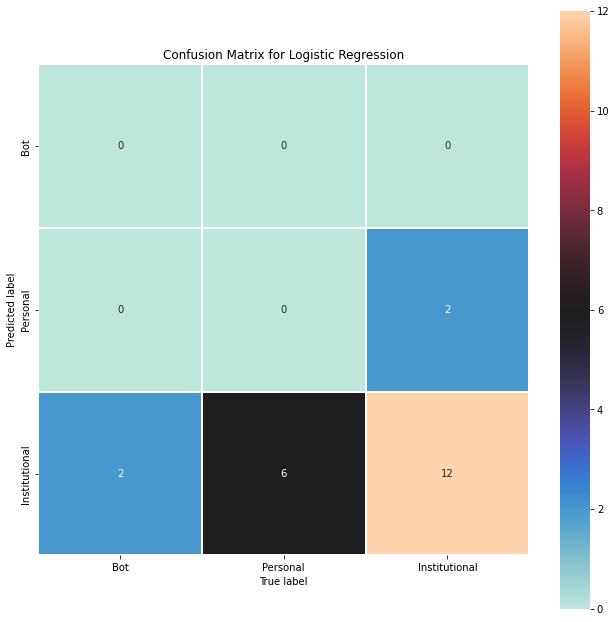

In [215]:
# Fitting model
print("[3] Fitting model..")
print("\t-Logistic Regression")
lr = LogisticRegression(C = 1.0, class_weight='balanced', solver="lbfgs", max_iter=150) 
y_pred_lr = lr.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_lr,'Logistic Regression')
print("\t-Done with Logistic Regression")

[3] Fitting model..
	-Random Forest Classifier
[4] Evaluating model..

 Accuracy_score for Random Forest Classifier = 0.5909090909090909 

               precision    recall  f1-score   support

          Bot       0.00      0.00      0.00         2
     Personal       0.00      0.00      0.00         6
Institutional       0.62      0.93      0.74        14

     accuracy                           0.59        22
    macro avg       0.21      0.31      0.25        22
 weighted avg       0.39      0.59      0.47        22

	-Done with Random Forest Classifier


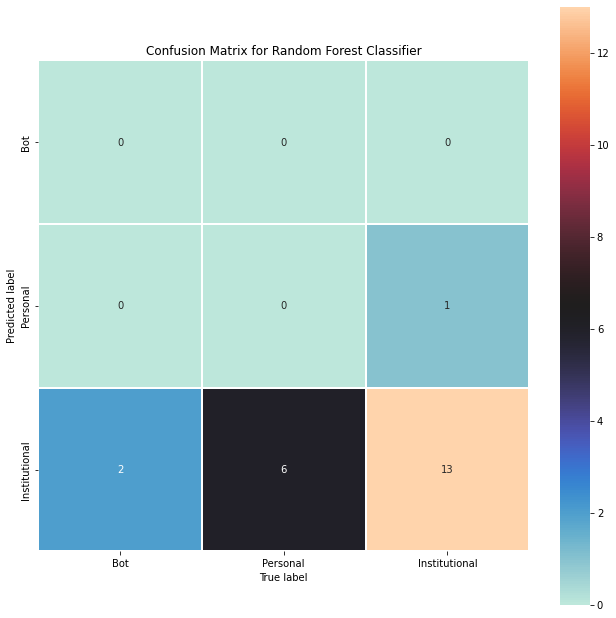

In [216]:
print("[3] Fitting model..")
print("\t-Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=10, random_state=12345)
y_pred_rf = rf.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_rf,'Random Forest Classifier')
print("\t-Done with Random Forest Classifier")

[3] Fitting model..
	-Multinomial Naive Bayes
[4] Evaluating model..

 Accuracy_score for Multinomial Naive Bayes = 0.5909090909090909 

               precision    recall  f1-score   support

          Bot       0.00      0.00      0.00         2
     Personal       0.33      0.17      0.22         6
Institutional       0.63      0.86      0.73        14

     accuracy                           0.59        22
    macro avg       0.32      0.34      0.32        22
 weighted avg       0.49      0.59      0.52        22

	-Done with Multinomial Naive Bayes


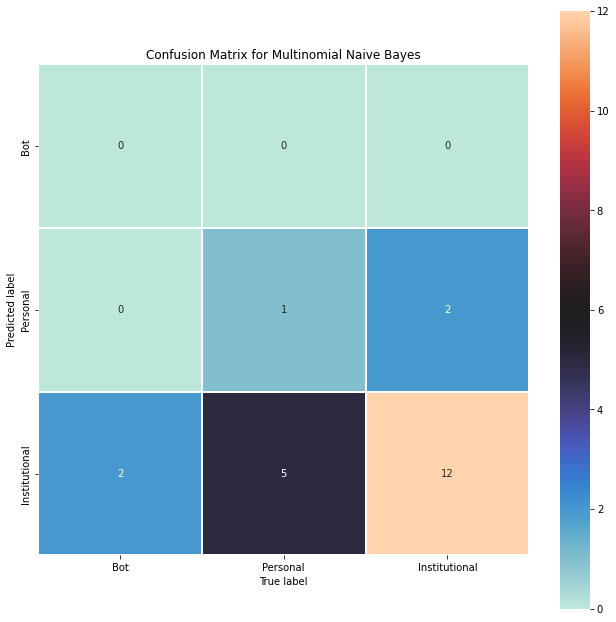

In [217]:
print("[3] Fitting model..")
print("\t-Multinomial Naive Bayes")
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
y_pred_nb = nb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'Multinomial Naive Bayes')
print("\t-Done with Multinomial Naive Bayes")

In [218]:
print("[3] Fitting model..")
print("\t-XGBoost Classifier")
xgb = XGBClassifier()
y_pred_xgb = xgb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'XGBoost')
print("\t-Done with XGBoost Classifier")

[3] Fitting model..
	-XGBoost Classifier


ValueError: ignored

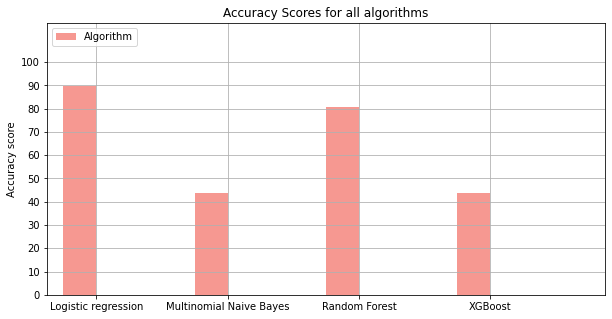

In [219]:
width = 0.25


# IMPROVED_SYSTEM: Logistic, MNV, RF
score = [89.88, 43.71, 80.54, 43.70]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

pos = list(range(len(score)))

plt.bar(pos, score, width, alpha=0.5, color='#EE3224', label='Development set')

# Set the y axis label
ax.set_ylabel('Accuracy score')

# Set the chart's title
ax.set_title('Accuracy Scores for all algorithms')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Logistic regression', 'Multinomial Naive Bayes', 'Random Forest', 'XGBoost'])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


plt.legend(['Algorithm'], loc='upper left')


plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(score)*1.3])

plt.grid()
plt.show()

In [220]:
# y_true = classes# ground truth labels
y_probas = rf.predict_proba(test_features)# predicted probabilities generated by sklearn classifier
skplt.metrics.plot_roc_curve(targets_test, y_probas)
plt.show()

IndexError: ignored

### Valence

In [112]:
valence_df

,index,username,author_followers,author_tweets,author_description,text,Valence-Ian
0,0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Unsupportive
1,1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Supportive
2,2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Supportive
3,3,KathleenHenry10,317,1634,NaN,Listen to the experts ðŸ‘‡ðŸ‘‡ #TriangleDelive...,Supportive
4,4,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Unclear
...,...,...,...,...,...,...,...
148,69,EluvialInc,37,290,Brokerage . Construction . Consulting,"Did you know that Washington, DC made the list...",Unclear
149,76,AskaNewYorker,3133,3999,https://t.co/mre7cb5gYD - perspectives and ins...,Amazon on the East River https://t.co/XzcNvY8S...,Unclear
150,77,OurTownDC,342,2139,Asking yourself - What ever happened to . . ....,Host Andy Ockershausen's guest in this new #Ou...,Unclear
151,84,SciConservative,344,18869,ðŸ‡ºðŸ‡¸ | Biology Student ðŸ”¬ | Classical L...,"""What's shocking to me is once again she shows...",Supportive


In [223]:
## Data Preprocessing

valence_df_new = valence_df.convert_dtypes()
valence_df_new = valence_df_new.dropna()
valence_df_new = valence_df_new.reset_index()
valence_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   level_0             91 non-null     int64 
 1   index               91 non-null     Int64 
 2   username            91 non-null     string
 3   author_followers    91 non-null     Int64 
 4   author_tweets       91 non-null     Int64 
 5   author_description  91 non-null     string
 6   text                91 non-null     string
 7   Valence-Ian         91 non-null     string
dtypes: Int64(3), int64(1), string(4)
memory usage: 6.1 KB


In [224]:
valence_df_new = valence_df_new.drop(["level_0", "index"], axis=1)
valence_df_new

,username,author_followers,author_tweets,author_description,text,Valence-Ian
0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Unsupportive
1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Supportive
2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Supportive
3,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Unclear
4,coolhand_luke88,911,25686,NYS Politics Digital News Producer for Spectru...,"Amazon Should Consider New York for HQ2, but P...",Balanced
...,...,...,...,...,...,...
86,EluvialInc,37,290,Brokerage . Construction . Consulting,"Did you know that Washington, DC made the list...",Unclear
87,AskaNewYorker,3133,3999,https://t.co/mre7cb5gYD - perspectives and ins...,Amazon on the East River https://t.co/XzcNvY8S...,Unclear
88,OurTownDC,342,2139,Asking yourself - What ever happened to . . ....,Host Andy Ockershausen's guest in this new #Ou...,Unclear
89,SciConservative,344,18869,ðŸ‡ºðŸ‡¸ | Biology Student ðŸ”¬ | Classical L...,"""What's shocking to me is once again she shows...",Supportive


In [225]:
## Splitting data into training and testing

training_data = valence_df_new[:80].reset_index()
training_data = training_data.drop(["index"], axis=1)
testing_data = valence_df_new[80:].reset_index()
testing_data = testing_data.drop(["index"], axis=1)

In [226]:
# Feature extraction
print("[2] Extracting features.. ")
# extract_features(training_data, test_data)
training_features, test_features = extract_features(training_data, testing_data)

[2] Extracting features.. 
	-Extracting tfidf vectors..
Features with lowest and highest idf in the body vector:

Features with lowest idf:
['amazonhq2' 'https' 'amazon' 'amazonhq2 https' 'amazon amazonhq2' 'new'
 'cities' 'need' 'amp' 'jobs']

Features with highest idf:
['greatest city' 'great work' 'great team' 'govt jobs' 'govt'
 'governor virginia' 'governor' 'governments spend' 'greatest'
 'œweâ going']
	-Tfidf vectors extracted..
	-Extracting word overlap..


80it [00:00, 555.65it/s]
11it [00:00, 349.35it/s]


	-Word overlap extracted..
	-Extracting cosine similarity..
	-Cosine similarity extracted..
	-Combined features returned..


In [227]:
classes = ['Balanced', 'Supportive', 'Unsupportive', 'Unclear']

In [228]:
# Creating targets

targets_tr = training_data['Valence-Ian']
targets_test = testing_data['Valence-Ian']

In [229]:
def change(f):
    if f == 'Unclear':
        return 0
    elif f == 'Balanced':
        return 1
    elif f == 'Supportive':
        return 2
    elif f == 'Unsupportive':
        return 3
    else:
        return 0

y = [change(x) for x in targets_tr]
y_test = [change(x) for x in targets_test]

In [230]:
test_features

<11x2877 sparse matrix of type '<class 'numpy.float64'>'
	with 557 stored elements in COOrdinate format>

[3] Fitting model..
	-Logistic Regression
[4] Evaluating model..

 Accuracy_score for Logistic Regression = 0.0 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00       0.0
  Supportive       0.00      0.00      0.00       3.0
Unsupportive       0.00      0.00      0.00       8.0
     Unclear       0.00      0.00      0.00       0.0

    accuracy                           0.00      11.0
   macro avg       0.00      0.00      0.00      11.0
weighted avg       0.00      0.00      0.00      11.0

	-Done with Logistic Regression


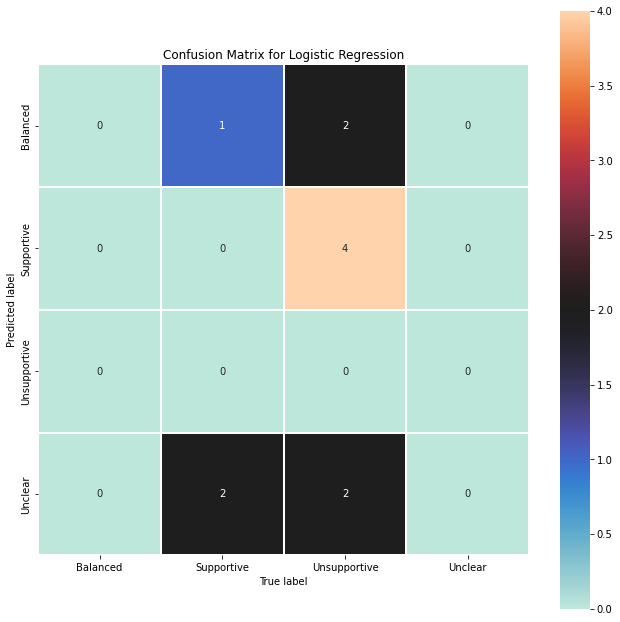

In [231]:
# Fitting model
print("[3] Fitting model..")
print("\t-Logistic Regression")
lr = LogisticRegression(C = 1.0, class_weight='balanced', solver="lbfgs", max_iter=150) 
y_pred_lr = lr.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_lr,'Logistic Regression')
print("\t-Done with Logistic Regression")

[3] Fitting model..
	-Random Forest Classifier
[4] Evaluating model..

 Accuracy_score for Random Forest Classifier = 0.09090909090909091 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00         0
  Supportive       0.14      0.33      0.20         3
Unsupportive       0.00      0.00      0.00         8
     Unclear       0.00      0.00      0.00         0

    accuracy                           0.09        11
   macro avg       0.04      0.08      0.05        11
weighted avg       0.04      0.09      0.05        11

	-Done with Random Forest Classifier


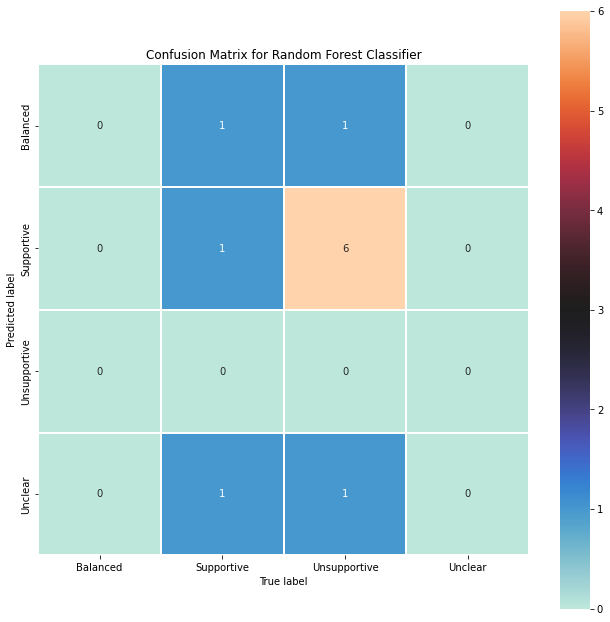

In [232]:
print("[3] Fitting model..")
print("\t-Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=10, random_state=12345)
y_pred_rf = rf.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_rf,'Random Forest Classifier')
print("\t-Done with Random Forest Classifier")

[3] Fitting model..
	-Multinomial Naive Bayes
[4] Evaluating model..

 Accuracy_score for Multinomial Naive Bayes = 0.09090909090909091 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00         0
  Supportive       0.20      0.33      0.25         3
Unsupportive       0.00      0.00      0.00         8
     Unclear       0.00      0.00      0.00         0

    accuracy                           0.09        11
   macro avg       0.05      0.08      0.06        11
weighted avg       0.05      0.09      0.07        11

	-Done with Multinomial Naive Bayes


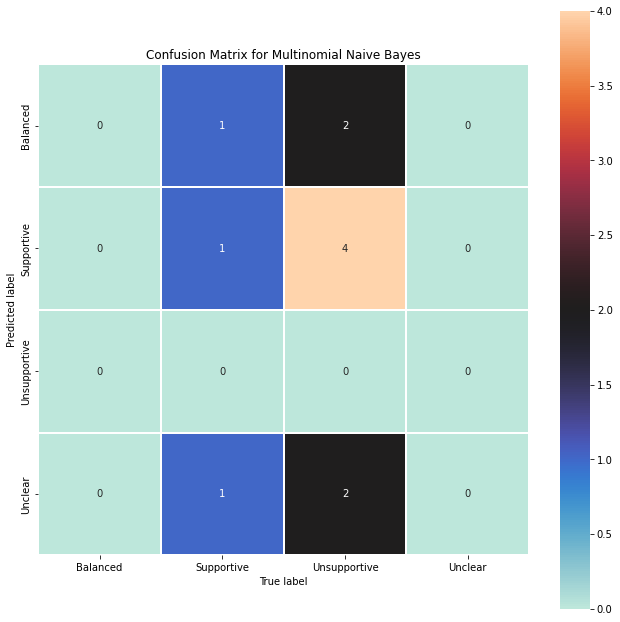

In [233]:
print("[3] Fitting model..")
print("\t-Multinomial Naive Bayes")
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
y_pred_nb = nb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'Multinomial Naive Bayes')
print("\t-Done with Multinomial Naive Bayes")

In [234]:
print("[3] Fitting model..")
print("\t-XGBoost Classifier")
xgb = XGBClassifier()
y_pred_xgb = xgb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'XGBoost')
print("\t-Done with XGBoost Classifier")

[3] Fitting model..
	-XGBoost Classifier


ValueError: ignored

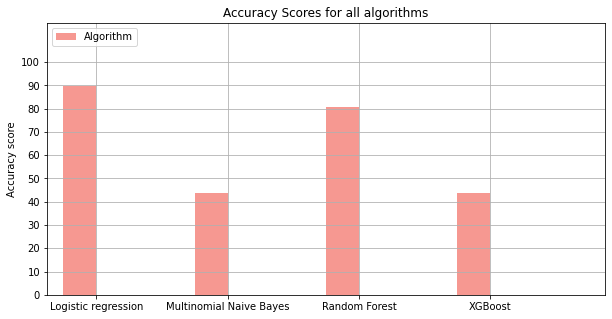

In [235]:
width = 0.25


# IMPROVED_SYSTEM: Logistic, MNV, RF
score = [89.88, 43.71, 80.54, 43.70]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

pos = list(range(len(score)))

plt.bar(pos, score, width, alpha=0.5, color='#EE3224', label='Development set')

# Set the y axis label
ax.set_ylabel('Accuracy score')

# Set the chart's title
ax.set_title('Accuracy Scores for all algorithms')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Logistic regression', 'Multinomial Naive Bayes', 'Random Forest', 'XGBoost'])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


plt.legend(['Algorithm'], loc='upper left')


plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(score)*1.3])

plt.grid()
plt.show()

### Topic

In [111]:
topic_df

,index,username,author_followers,author_tweets,author_description,text,Topic-Ian
0,0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Amazon (Not HQ2)
1,1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Amazon HQ2- with opinion
2,2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Amazon HQ2- with opinion
3,3,KathleenHenry10,317,1634,NaN,Listen to the experts ðŸ‘‡ðŸ‘‡ #TriangleDelive...,Amazon HQ2- with opinion
4,4,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Amazon HQ2- with opinion
...,...,...,...,...,...,...,...
131,5,andrewmossca,341,1126,Champion of Human Potential â€¢ Guiding Ambiti...,@laurastevens Toronto #AmazonHQ2 #WeTheNorth,Amazon HQ2- with opinion
132,7,jeffreyrohr,805,957,CEO & Founder @SquareOffs ðŸ§± Building The Op...,#KC is number 1 on the list https://t.co/g8iSH...,Amazon HQ2- with opinion
133,23,chipgoines,5047,192396,Turned out voters for @AyannaPressley's histor...,.@marty_walsh (@MartyForBoston) won't debate @...,Not about Amazon HQ2
134,47,griffbos,2814,168725,I retweet various tweets because I feel they a...,@NHGOP @NHDems @GovChrisSununu Translation @NH...,Amazon HQ2- No opinion


In [237]:
## Data Preprocessing

topic_df_new = topic_df.convert_dtypes()
topic_df_new = topic_df_new.dropna()
topic_df_new = topic_df_new.reset_index()
topic_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   level_0             128 non-null    int64 
 1   index               128 non-null    Int64 
 2   username            128 non-null    string
 3   author_followers    128 non-null    Int64 
 4   author_tweets       128 non-null    Int64 
 5   author_description  128 non-null    string
 6   text                128 non-null    string
 7   Topic-Ian           128 non-null    string
dtypes: Int64(3), int64(1), string(4)
memory usage: 8.5 KB


In [238]:
topic_df_new = topic_df_new.drop(["level_0", "index"], axis=1)
topic_df_new

,username,author_followers,author_tweets,author_description,text,Topic-Ian
0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Amazon (Not HQ2)
1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Amazon HQ2- with opinion
2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Amazon HQ2- with opinion
3,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",Amazon HQ2- with opinion
4,andrewmossca,341,1126,Champion of Human Potential â€¢ Guiding Ambiti...,@laurastevens Toronto #AmazonHQ2 #WeTheNorth,Amazon HQ2- No opinion
...,...,...,...,...,...,...
123,andrewmossca,341,1126,Champion of Human Potential â€¢ Guiding Ambiti...,@laurastevens Toronto #AmazonHQ2 #WeTheNorth,Amazon HQ2- with opinion
124,jeffreyrohr,805,957,CEO & Founder @SquareOffs ðŸ§± Building The Op...,#KC is number 1 on the list https://t.co/g8iSH...,Amazon HQ2- with opinion
125,chipgoines,5047,192396,Turned out voters for @AyannaPressley's histor...,.@marty_walsh (@MartyForBoston) won't debate @...,Not about Amazon HQ2
126,griffbos,2814,168725,I retweet various tweets because I feel they a...,@NHGOP @NHDems @GovChrisSununu Translation @NH...,Amazon HQ2- No opinion


In [239]:
## Splitting data into training and testing

training_data = topic_df_new[:100].reset_index()
training_data = training_data.drop(["index"], axis=1)
testing_data = topic_df_new[100:].reset_index()
testing_data = testing_data.drop(["index"], axis=1)

In [240]:
# Feature extraction
print("[2] Extracting features.. ")
# extract_features(training_data, test_data)
training_features, test_features = extract_features(training_data, testing_data)

[2] Extracting features.. 
	-Extracting tfidf vectors..
Features with lowest and highest idf in the body vector:

Features with lowest idf:
['amazonhq2' 'https' 'amazon' 'amazonhq2 https' 'new' 'cities'
 'amazon amazonhq2' 'hq2' 'headquarters' 'amp']

Features with highest idf:
['g8ishxq47f' 'funds fucking' 'funds' 'fulfillment center' 'fulfillment'
 'fucking unacceptable' 'fucking' 'fridaythoughts amazonhq2' 'fightfor15'
 'œweâ going']
	-Tfidf vectors extracted..
	-Extracting word overlap..


100it [00:00, 454.52it/s]
28it [00:00, 708.87it/s]


	-Word overlap extracted..
	-Extracting cosine similarity..
	-Cosine similarity extracted..
	-Combined features returned..


In [ ]:
classes = ['Not about Amazon HQ2', 'Amazon (Not HQ2)', 'Amazon HQ2- No opinion', 'Amazon HQ2- with opinion']

In [241]:
# Creating targets

targets_tr = training_data['Topic-Ian']
targets_test = testing_data['Topic-Ian']

In [242]:
def change(f):
    if f == 'Not about Amazon HQ2':
        return 0
    elif f == 'Amazon (Not HQ2)':
        return 1
    elif f == 'Amazon HQ2- No opinion':
        return 2
    elif f == 'Amazon HQ2- with opinion':
        return 3
    else:
        return 0

y = [change(x) for x in targets_tr]
y_test = [change(x) for x in targets_test]

In [243]:
test_features

<28x4004 sparse matrix of type '<class 'numpy.float64'>'
	with 1408 stored elements in COOrdinate format>

[3] Fitting model..
	-Logistic Regression
[4] Evaluating model..

 Accuracy_score for Logistic Regression = 0.0 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00       0.0
  Supportive       0.00      0.00      0.00       2.0
Unsupportive       0.00      0.00      0.00      22.0
     Unclear       0.00      0.00      0.00       4.0

    accuracy                           0.00      28.0
   macro avg       0.00      0.00      0.00      28.0
weighted avg       0.00      0.00      0.00      28.0

	-Done with Logistic Regression


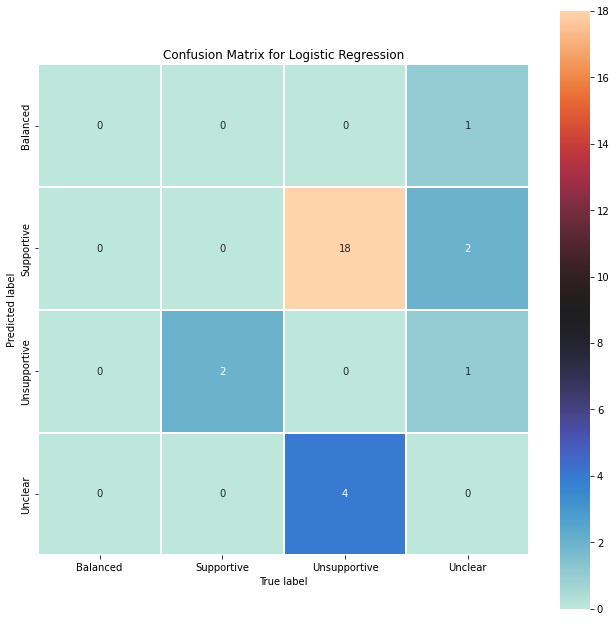

In [244]:
# Fitting model
print("[3] Fitting model..")
print("\t-Logistic Regression")
lr = LogisticRegression(C = 1.0, class_weight='balanced', solver="lbfgs", max_iter=150) 
y_pred_lr = lr.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_lr,'Logistic Regression')
print("\t-Done with Logistic Regression")

[3] Fitting model..
	-Random Forest Classifier
[4] Evaluating model..

 Accuracy_score for Random Forest Classifier = 0.03571428571428571 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00         0
  Supportive       0.05      0.50      0.09         2
Unsupportive       0.00      0.00      0.00        22
     Unclear       0.00      0.00      0.00         4

    accuracy                           0.04        28
   macro avg       0.01      0.12      0.02        28
weighted avg       0.00      0.04      0.01        28

	-Done with Random Forest Classifier


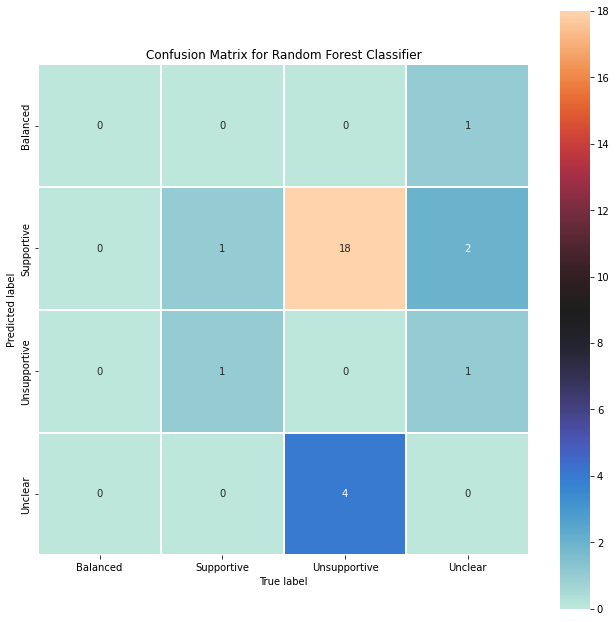

In [245]:
print("[3] Fitting model..")
print("\t-Random Forest Classifier")
rf = RandomForestClassifier(n_estimators=10, random_state=12345)
y_pred_rf = rf.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_rf,'Random Forest Classifier')
print("\t-Done with Random Forest Classifier")

[3] Fitting model..
	-Multinomial Naive Bayes
[4] Evaluating model..

 Accuracy_score for Multinomial Naive Bayes = 0.0 

              precision    recall  f1-score   support

    Balanced       0.00      0.00      0.00       0.0
  Supportive       0.00      0.00      0.00       2.0
Unsupportive       0.00      0.00      0.00      22.0
     Unclear       0.00      0.00      0.00       4.0

    accuracy                           0.00      28.0
   macro avg       0.00      0.00      0.00      28.0
weighted avg       0.00      0.00      0.00      28.0

	-Done with Multinomial Naive Bayes


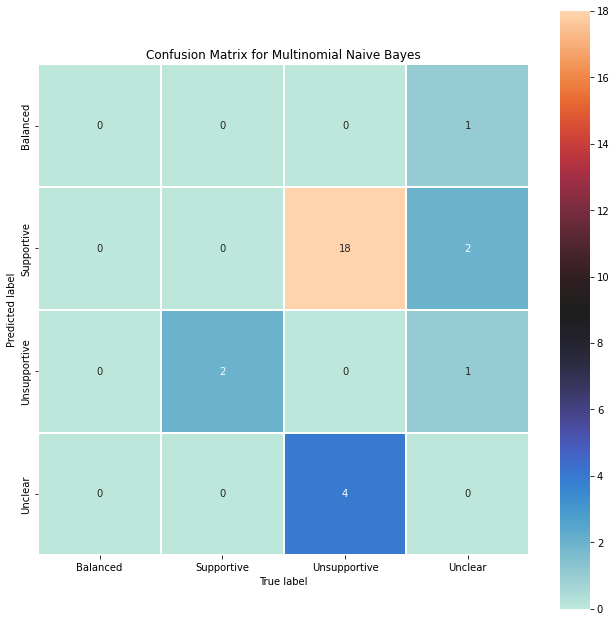

In [246]:
print("[3] Fitting model..")
print("\t-Multinomial Naive Bayes")
nb = MultinomialNB(alpha=0.01, class_prior=None, fit_prior=True)
y_pred_nb = nb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'Multinomial Naive Bayes')
print("\t-Done with Multinomial Naive Bayes")

In [247]:
print("[3] Fitting model..")
print("\t-XGBoost Classifier")
xgb = XGBClassifier()
y_pred_xgb = xgb.fit(training_features, targets_tr).predict(test_features)
# Evaluation
print("[4] Evaluating model..")
report_score(targets_test, y_pred_nb,'XGBoost')
print("\t-Done with XGBoost Classifier")

[3] Fitting model..
	-XGBoost Classifier


ValueError: ignored

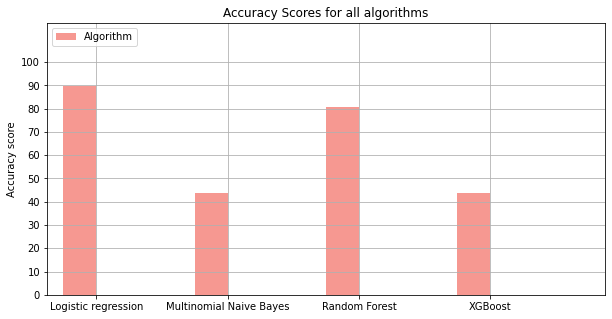

In [248]:
width = 0.25


# IMPROVED_SYSTEM: Logistic, MNV, RF
score = [89.88, 43.71, 80.54, 43.70]

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

pos = list(range(len(score)))

plt.bar(pos, score, width, alpha=0.5, color='#EE3224', label='Development set')

# Set the y axis label
ax.set_ylabel('Accuracy score')

# Set the chart's title
ax.set_title('Accuracy Scores for all algorithms')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(['Logistic regression', 'Multinomial Naive Bayes', 'Random Forest', 'XGBoost'])
ax.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])


plt.legend(['Algorithm'], loc='upper left')


plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(score)*1.3])

plt.grid()
plt.show()

## Method 2 - Transformers

In [ ]:
# importing required libraries

from transformers import pipeline

In [ ]:
# Allocating a pipeline for sentiment-analysis
classifier = pipeline('sentiment-analysis')

result = classifier('Local stories covered by the journalists who live here â€” plus the best investigations, opinion, national and international news.')

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [ ]:
result[0]['label'], result[0]['score']

('POSITIVE', 0.9993281364440918)

In [ ]:
full_data_df ["sentiment"] = None
full_data_df ["score"] = None

In [ ]:
full_data_df.head()

,username,author_followers,author_tweets,author_description,author_location,text,sentiment,score
0,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",michigan,- @Amazon #AmazonHQ2 narrowed its search for t...,None,None
1,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",greatest city in the world,- @HPSInsight has an analysis of where #amazon...,None,None
2,detroitcp,2620,367177,breaking news and weather updates from detroit.,"detroit, mi",- Chad Livengood writes: On https://t.co/UKWMO...,None,None
3,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,nyc,"- Since âpulling outâ Amazon has 1,577 new...",None,None
4,bezostown,546,8512,creator of bezostownbucks paper currency. this...,"seattle, wa",! Chicago âattempted to appeal personally to...,None,None


In [ ]:
for i in full_data_df.index:
  result = classifier(full_data_df['text'][i])
  full_data_df['sentiment'][i] = result[0]['label']
  full_data_df['score'][i] = result[0]['score']

<ipython-input-40-f90b6bfde8fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_df['sentiment'][i] = result[0]['label']
<ipython-input-40-f90b6bfde8fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_data_df['score'][i] = result[0]['score']


In [ ]:
full_data_df

,username,author_followers,author_tweets,author_description,author_location,text,sentiment,score
0,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",michigan,- @Amazon #AmazonHQ2 narrowed its search for t...,NEGATIVE,0.994882
1,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",greatest city in the world,- @HPSInsight has an analysis of where #amazon...,NEGATIVE,0.977926
2,detroitcp,2620,367177,breaking news and weather updates from detroit.,"detroit, mi",- Chad Livengood writes: On https://t.co/UKWMO...,NEGATIVE,0.995907
3,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,nyc,"- Since âpulling outâ Amazon has 1,577 new...",NEGATIVE,0.986987
4,bezostown,546,8512,creator of bezostownbucks paper currency. this...,"seattle, wa",! Chicago âattempted to appeal personally to...,POSITIVE,0.952286
...,...,...,...,...,...,...,...,...
39945,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates rents in Boston will rise $48...,NEGATIVE,0.98135
39946,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Denver will ris...,NEGATIVE,0.95315
39947,goodjobsfirst,5093,11590,a leading watchdog on corporate subsidies sinc...,"washington, dc",Zillow estimates that rents in Los Angeles wil...,NEGATIVE,0.939852
39948,seattletimes,692051,218463,"local news, sports, business, politics, entert...","seattle, wa","Zillow estimates that rents in Nashville, 1 of...",NEGATIVE,0.978664


In [ ]:
full_data_df.to_excel(r'sentiment.xlsx', index=False)

## Data Insight

In [119]:
# Importing required packages

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import display

In [120]:
## Prediction Data

full_data_df = full_data_df.drop(["author_location"], axis=1)

In [121]:
full_data_df.head()

,username,author_followers,author_tweets,author_description,text
0,johnpullum,33637,14033,"tv host, speaker & youtuber. as seen on tv as ...",- @Amazon #AmazonHQ2 narrowed its search for t...
1,carlquintanilla,333243,99376,"20+ years at @cnbc & @nbcnews / peabody award,...",- @HPSInsight has an analysis of where #amazon...
2,detroitcp,2620,367177,breaking news and weather updates from detroit.,- Chad Livengood writes: On https://t.co/UKWMO...
3,profgalloway,433871,34919,product of big government @ucla @ucberkeley | ...,"- Since âpulling outâ Amazon has 1,577 new..."
4,bezostown,546,8512,creator of bezostownbucks paper currency. this...,! Chicago âattempted to appeal personally to...


In [122]:
usertype_df.head()

,index,username,author_followers,author_tweets,author_description,text,User type-Ian
0,0,NelpNews,11229,33073,National Employment Law Project strives to bui...,"""What the wage hike amounts to, then, is a gif...",Other Relevant Actors
1,1,thestaredmonton,55645,82619,Local stories covered by the journalists who l...,'In it to win it': Edmonton puts in bid for ne...,Media
2,2,jesseblucero,7709,61636,"#Digital #Advertiser ~ LOVER of LIFE, music, a...",Entrepreneur: These 5 Cities Pulled Out All th...,Business Account
3,3,KathleenHenry10,317,1634,NaN,Listen to the experts ðŸ‘‡ðŸ‘‡ #TriangleDelive...,Other Relevant Actors
4,4,DarMagnani,252,9959,"Chemist turned investor, psychologist turned p...","So, Amazon has spoken: while NYC is quite logi...",General Public


In [123]:
usertype_df.describe()

,index,author_followers,author_tweets
count,144.000000,144.000000,144.000000
mean,48.548611,11163.305556,43514.715278
std,29.833062,60207.749646,83629.608877
min,0.000000,1.000000,54.000000
25%,22.750000,278.250000,2368.000000
50%,46.500000,1230.000000,10497.000000
75%,75.250000,3378.250000,41704.250000
max,99.000000,692051.000000,403533.000000


In [124]:
usertype_df.corr()

,index,author_followers,author_tweets
index,1.000000,-0.157332,-0.039420
author_followers,-0.157332,1.000000,0.214443
author_tweets,-0.039420,0.214443,1.000000


array([[<Axes: xlabel='index', ylabel='index'>,
        <Axes: xlabel='author_followers', ylabel='index'>,
        <Axes: xlabel='author_tweets', ylabel='index'>],
       [<Axes: xlabel='index', ylabel='author_followers'>,
        <Axes: xlabel='author_followers', ylabel='author_followers'>,
        <Axes: xlabel='author_tweets', ylabel='author_followers'>],
       [<Axes: xlabel='index', ylabel='author_tweets'>,
        <Axes: xlabel='author_followers', ylabel='author_tweets'>,
        <Axes: xlabel='author_tweets', ylabel='author_tweets'>]],
      dtype=object)

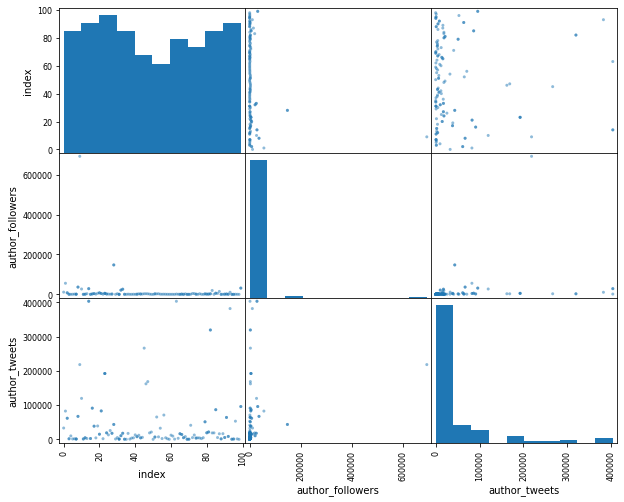

In [125]:
from pandas.plotting import scatter_matrix

scatter_matrix(usertype_df, figsize = (10,8))